# Landscape Learning - Channel Age Groups Statistical Tests

In [75]:
# Dave Hunt
# University of Washington
# December 16, 2021

# This notebook runs regression analysis and statistical tests on the Dlist and Olist ranked lists produced to
# test Discoverability of toolstone sources surrounding the Old River Bed delta archaeological sites.

#  Discoverability/ 
#    │
#    │
#    ├──notebooks/
#    │   └── Landscape Learning - D Groups statistical tests.ipynb
#    │   │
#    │   └── Landscape Learning - C Groups statistical tests.ipynb
#    │
#    │──shapefiles/
#    │
#    └──Excel/
#
# Copyright (c) 2021, David Hunt
# All rights reserved.

# This source code is licensed under the BSD-style license found in the
# LICENSE file in the root directory of this source tree. 

This notebook is used to perform linear regression on the Channel Age groups Dlist and Olist data created in the associated Excel spreadsheet. In this notebook, simple linear regression is run on the Dlist and Olist data to ensure 
its statistical validity.  The results are then used to produce the %LL value for each group.  These %LL values are plotted over time to gauge landscape learning over the time of the Paleoindian occupation of the Old River Bed delta in Utah, USA

In [5]:
# included Python libraries
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.sandbox.stats.runs import runstest_1samp 

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker

import scipy as scipy
from scipy import stats
from scipy.stats import shapiro

import numpy as np
import pandas as pd

In [6]:
# function that returns a line with equation mx+b 
def linear(x, m, b):
    return m*x + b

In [7]:
# The C group (C1 - C5) Dlists (expected rank orders)
c1_dlist = np.array([1,15,6,2,5,11,4,13,7,12,16,10,8,9,14,3])  # Black channel, same as D1
c2_dlist = np.array([2,15,6,3,5,11,4,13,7,12,16,9,8,14,10,1])  # Green channel
c3_dlist = np.array([1,15,6,3,5,11,4,13,7,12,16,10,8,14,9,2])  # Blue B channel
c4_dlist = np.array([1,15,6,3,4,11,5,14,7,12,16,9,8,13,10,2])  # Light Blue channel
c5_dlist = np.array([3,15,6,2,5,11,4,13,7,12,16,9,8,14,10,1])  # Lavender channel

# The C Group Olists (actual/observed artifact counts)
c1_olist = pd.Series([14,0,5,23,6,2,7,0,117,0,3,3,1,0,0,48])
c2_olist = pd.Series([0,0,2,11,0,1,1,0,20,0,0,2,1,1,0,30])
c3_olist = pd.Series([2,0,1,1,0,0,1,1,5,1,0,1,0,0,0,11])
c4_olist = pd.Series([1,1,2,8,2,0,1,0,38,0,0,2,0,1,1,21])
c5_olist = pd.Series([0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,16])

In [8]:
c1_olist_rank = c1_olist.rank(ascending = False)
c2_olist_rank = c2_olist.rank(ascending = False)
c3_olist_rank = c3_olist.rank(ascending = False)
c4_olist_rank = c4_olist.rank(ascending = False)
c5_olist_rank = c5_olist.rank(ascending = False)

In [9]:
# Compare the Dlist and Olist pair for each C group using Pearson's product moment correlation
c1_pearson_r, c1_pearson_r_pval = stats.pearsonr(c1_olist_rank, c1_dlist)
print("C1 Pearson's r:          ", str(round(c1_pearson_r, 3)))
print("C1 Pearson's r, p value: ", str(round(c1_pearson_r_pval, 4)))
print("--------------------------------")
c2_pearson_r, c2_pearson_r_pval = stats.pearsonr(c2_olist_rank, c2_dlist)
print("C2 Pearson's r:          ", str(round(c2_pearson_r, 3)))
print("C2 Pearson's r, p value: ", str(round(c2_pearson_r_pval, 3)))
print("--------------------------------")
c3_pearson_r, c3_pearson_r_pval = stats.pearsonr(c3_olist_rank, c3_dlist)
print("C3 Pearson's r:          ", str(round(c3_pearson_r, 3)))
print("C3 Pearson's r, p value: ", str(round(c3_pearson_r_pval, 3)))
print("--------------------------------")
c4_pearson_r, c4_pearson_r_pval = stats.pearsonr(c4_olist_rank, c4_dlist)
print("C4 Pearson's r:          ", str(round(c4_pearson_r, 3)))
print("C4 Pearson's r, p value: ", str(round(c4_pearson_r_pval, 3)))
print("--------------------------------")
c5_pearson_r, c5_pearson_r_pval = stats.pearsonr(c5_olist_rank, c5_dlist)
print("C5 Pearson's r:          ", str(round(c5_pearson_r, 3)))
print("C5 Pearson's r, p value: ", str(round(c5_pearson_r_pval, 3)))

C1 Pearson's r:           0.777
C1 Pearson's r, p value:  0.0004
--------------------------------
C2 Pearson's r:           0.502
C2 Pearson's r, p value:  0.048
--------------------------------
C3 Pearson's r:           0.597
C3 Pearson's r, p value:  0.015
--------------------------------
C4 Pearson's r:           0.636
C4 Pearson's r, p value:  0.008
--------------------------------
C5 Pearson's r:           0.5
C5 Pearson's r, p value:  0.048


In [10]:
# Compare the Dlist and Olist pair for each C group using Spearmans's rank-order correlation
c1_spearman_r, c1_spearman_r_pval = stats.spearmanr(c1_olist_rank, c1_dlist)
print("c1 Spearman's r:          ", str(round(c1_spearman_r, 5)))
print("c1 Spearman's r, p value: ", str(round(c1_spearman_r_pval, 4)))
c1_r2 = c1_spearman_r * c1_spearman_r
print("c1 Spearman's r2:         ", round(c1_r2, 5))
print("c1 %LL = ", round(1 - c1_r2,3) * 100)
print("--------------------------------")

c2_spearman_r, c2_spearman_r_pval = stats.spearmanr(c2_olist_rank, c2_dlist)
print("c2 Spearman's r:          ", str(round(c2_spearman_r, 5)))
print("c2 Spearman's r, p value: ", str(round(c2_spearman_r_pval, 3)))
c2_r2 = c2_spearman_r * c2_spearman_r
print("c2 Spearman's r2:         ", round(c2_r2, 5))
print("c2 %LL = ", round(1 - c2_r2,3) * 100)
print("--------------------------------")

c3_spearman_r, c3_spearman_r_pval = stats.spearmanr(c3_olist_rank, c3_dlist)
print("c3 Spearman's r:          ", str(round(c3_spearman_r, 5)))
print("c3 Spearman's r, p value: ", str(round(c3_spearman_r_pval, 3)))
c3_r2 = c3_spearman_r * c3_spearman_r
print("c3 Spearman's r2:         ", round(c3_r2, 5))
print("c3 %LL = ", round(1 - c3_r2,3) * 100)
print("--------------------------------")

c4_spearman_r, c4_spearman_r_pval = stats.spearmanr(c4_olist_rank, c4_dlist)
print("c4 Spearman's r:          ", str(round(c4_spearman_r, 5)))
print("c4 Spearman's r, p value: ", str(round(c4_spearman_r_pval, 3)))
c4_r2 = c4_spearman_r * c4_spearman_r
print("c4 Spearman's r2:         ", round(c4_r2, 5))
print("c4 %LL = ", round(1 - c4_r2,4) * 100)
print("--------------------------------")

c5_spearman_r, c5_spearman_r_pval = stats.spearmanr(c5_olist_rank, c5_dlist)
print("c5 Spearman's r:          ", str(round(c5_spearman_r, 5)))
print("c5 Spearman's r, p value: ", str(round(c5_spearman_r_pval, 3)))
c5_r2 = c5_spearman_r * c5_spearman_r
print("c5 Spearman's r2:         ", round(c5_r2, 5))
print("c5 %LL = ", round(1 - c5_r2,3) * 100)

c1 Spearman's r:           0.77679
c1 Spearman's r, p value:  0.0004
c1 Spearman's r2:          0.60341
c1 %LL =  39.7
--------------------------------
c2 Spearman's r:           0.50183
c2 Spearman's r, p value:  0.048
c2 Spearman's r2:          0.25184
c2 %LL =  74.8
--------------------------------
c3 Spearman's r:           0.59728
c3 Spearman's r, p value:  0.015
c3 Spearman's r2:          0.35675
c3 %LL =  64.3
--------------------------------
c4 Spearman's r:           0.63561
c4 Spearman's r, p value:  0.008
c4 Spearman's r2:          0.404
c4 %LL =  59.599999999999994
--------------------------------
c5 Spearman's r:           0.50048
c5 Spearman's r, p value:  0.048
c5 Spearman's r2:          0.25048
c5 %LL =  75.0


In [11]:
# Form the lists into a Pandas dataframe

c1_dlist = np.array([1,15,6,2,5,11,4,13,7,12,16,10,8,9,14,3]).reshape((-1, 1))
c2_dlist = np.array([2,15,6,3,5,11,4,13,7,12,16,9,8,14,10,1]).reshape((-1, 1))
c3_dlist = np.array([1,15,6,3,5,11,4,13,7,12,16,10,8,14,9,2]).reshape((-1, 1))
c4_dlist = np.array([1,15,6,3,4,11,5,14,7,12,16,9,8,13,10,2]).reshape((-1, 1))
c5_dlist = np.array([3,15,6,2,5,11,4,13,7,12,16,9,8,14,10,1]).reshape((-1, 1))

c1_x = list(np.concatenate(c1_dlist).flat)
c2_x = list(np.concatenate(c2_dlist).flat)
c3_x = list(np.concatenate(c3_dlist).flat)
c4_x = list(np.concatenate(c4_dlist).flat)
c5_x = list(np.concatenate(c5_dlist).flat)

c1_y = c1_olist_rank.tolist()
c2_y = c2_olist_rank.tolist()
c3_y = c3_olist_rank.tolist()
c4_y = c4_olist_rank.tolist()
c5_y = c5_olist_rank.tolist()

#create dataset
C_df = pd.DataFrame({'c1_x': c1_x,
                     'c1_y': c1_y,
                     'c2_x': c2_x,
                     'c2_y': c2_y,
                     'c3_x': c3_x,
                     'c3_y': c3_y,                     
                     'c4_x': c4_x,
                     'c4_y': c4_y,                     
                     'c5_x': c5_x,
                     'c5_y': c5_y})
#view dataset
C_df

,c1_x,c1_y,c2_x,c2_y,c3_x,c3_y,c4_x,c4_y,c5_x,c5_y
0,1,4.0,2,13.0,1,3.0,1,9.0,3,10.0
1,15,14.0,15,13.0,15,13.0,15,9.0,15,10.0
2,6,7.0,6,4.5,6,6.5,6,5.0,6,10.0
3,2,3.0,3,3.0,3,6.5,3,3.0,2,2.0
4,5,6.0,5,13.0,5,13.0,4,5.0,5,10.0
5,11,10.0,11,7.5,11,13.0,11,14.0,11,10.0
6,4,5.0,4,7.5,4,6.5,5,9.0,4,10.0
7,13,14.0,13,13.0,13,6.5,14,14.0,13,10.0
8,7,1.0,7,2.0,7,2.0,7,1.0,7,10.0
9,12,14.0,12,13.0,12,6.5,12,14.0,12,10.0


## Run regression on each group

In [12]:
#fit multiple linear regression model
C1_model = ols('c1_y ~ c1_x', data=C_df).fit()

#view model summary
print(C1_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   c1_y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     21.30
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           0.000401
Time:                        11:26:20   Log-Likelihood:                -39.504
No. Observations:                  16   AIC:                             83.01
Df Residuals:                      14   BIC:                             84.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000      1.602      1.248      0.2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [13]:
#fit multiple linear regression model
C2_model = ols('c2_y ~ c2_x', data=C_df).fit()

#view model summary
print(C2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   c2_y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.713
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0476
Time:                        11:26:21   Log-Likelihood:                -44.003
No. Observations:                  16   AIC:                             92.01
Df Residuals:                      14   BIC:                             93.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4500      2.122      2.097      0.0

In [14]:
#fit multiple linear regression model
C3_model = ols('c3_y ~ c3_x', data=C_df).fit()

#view model summary
print(C3_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   c3_y   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     7.764
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0146
Time:                        11:26:22   Log-Likelihood:                -42.475
No. Observations:                  16   AIC:                             88.95
Df Residuals:                      14   BIC:                             90.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7750      1.929      1.957      0.0

In [15]:
#fit multiple linear regression model
C4_model = ols('c4_y ~ c4_x', data=C_df).fit()

#view model summary
print(C4_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   c4_y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     9.490
Date:                Thu, 16 Dec 2021   Prob (F-statistic):            0.00814
Time:                        11:26:22   Log-Likelihood:                -42.479
No. Observations:                  16   AIC:                             88.96
Df Residuals:                      14   BIC:                             90.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2750      1.929      1.697      0.1

In [16]:
#fit multiple linear regression model
C5_model = ols('c5_y ~ c5_x', data=C_df).fit()

#view model summary
print(C5_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   c5_y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     4.679
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0483
Time:                        11:26:23   Log-Likelihood:                -38.716
No. Observations:                  16   AIC:                             81.43
Df Residuals:                      14   BIC:                             82.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6000      1.525      3.672      0.0

slope = 0.76 (+/-) 0.17
y-intercept = 2.00 (+/-) 1.60


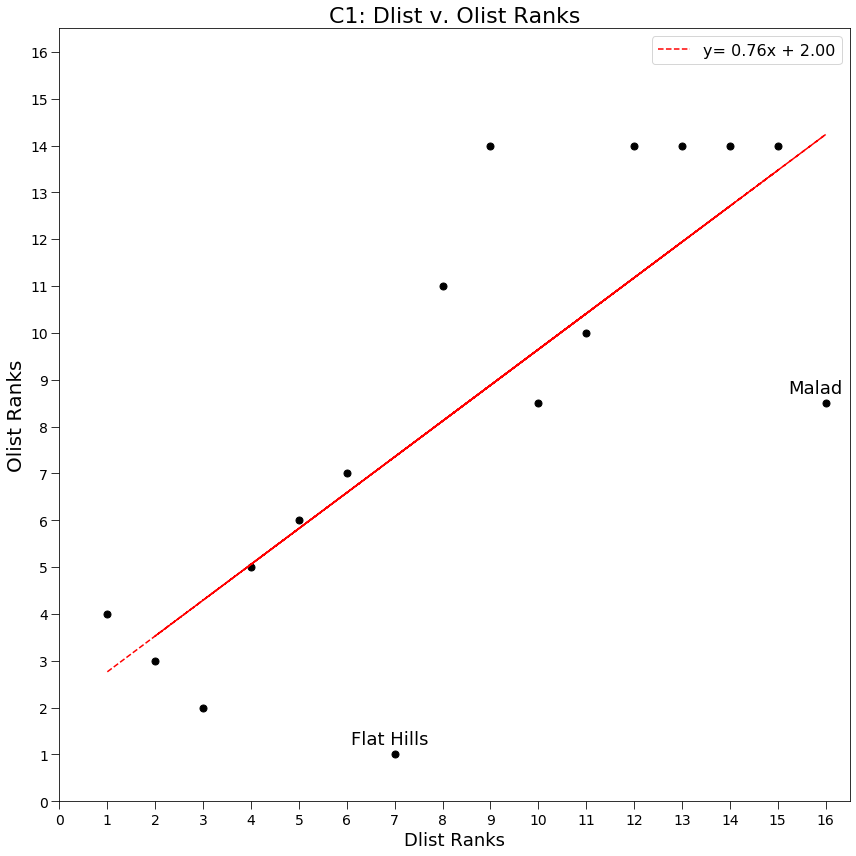

In [21]:
# C1 Dlist v Olist
# fits the data to a line and plots it
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c1_x, C_df.c1_y, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, C_df.c1_x, C_df.c1_y)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(C_df.c1_x, linear(C_df.c1_x, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C1: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()

plt.annotate("Malad",               # this is the text
        (16,8.5),                   # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        size=18,
        xytext=(-10,10),            # distance from text to points (x,y)
        ha='center')                # horizontal alignment can be left, right or center    

plt.annotate("Flat Hills", 
        (7,1), 
        textcoords="offset points", 
        size=18,
        xytext=(-5,10), 
        ha='center') 
    
plt.savefig('c1 regression chart.png')

slope = 0.48 (+/-) 0.22
y-intercept = 4.45 (+/-) 2.12


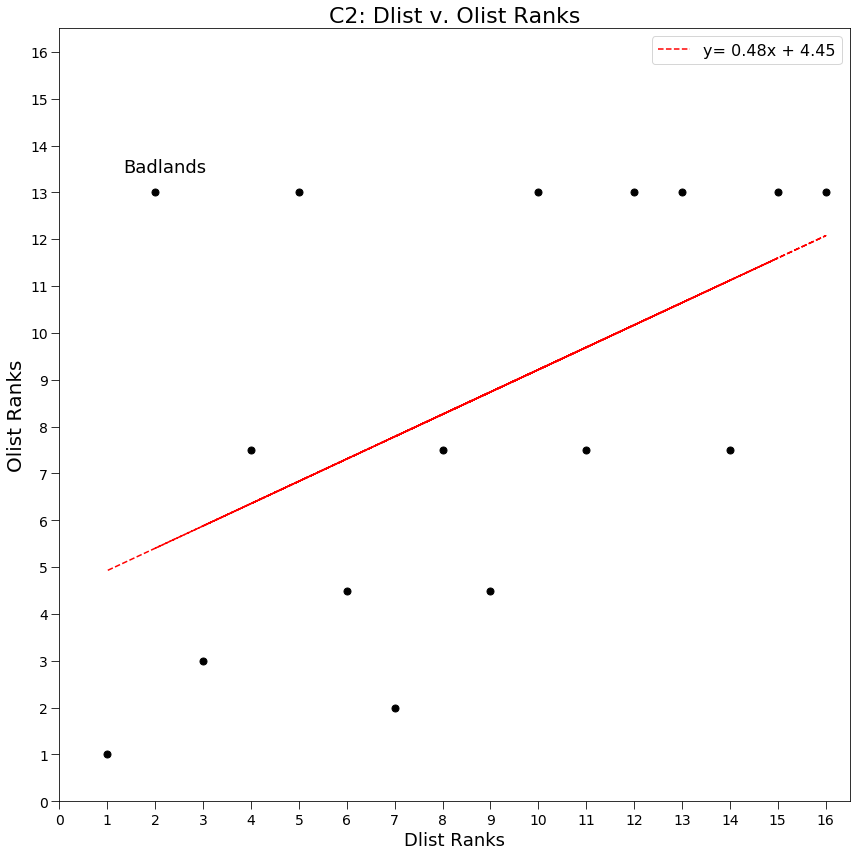

In [23]:
# C2 Dlist v Olist
# fits the data to a line and plots itfig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c2_x, C_df.c2_y, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, C_df.c2_x, C_df.c2_y)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(C_df.c2_x, linear(C_df.c2_x, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C2: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

plt.annotate("Badlands", 
        (2,13),
        textcoords="offset points", 
        size=18,
        xytext=(10,20), 
        ha='center') 

fig.tight_layout()
    
plt.savefig('C2 regression chart.png')

slope = 0.56 (+/-) 0.20
y-intercept = 3.78 (+/-) 1.93


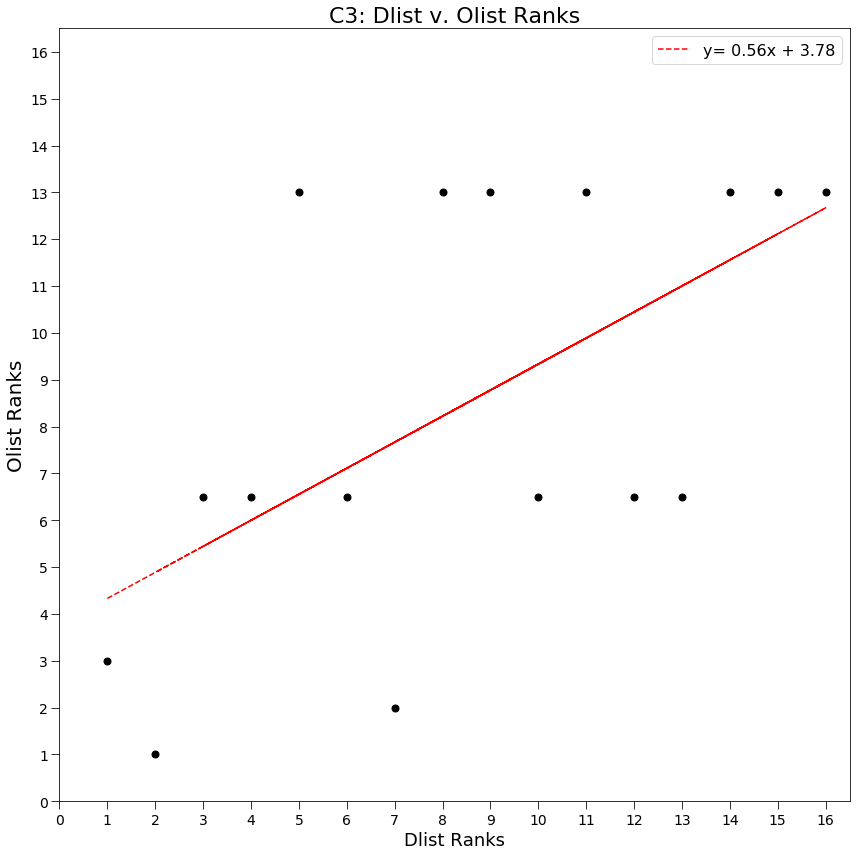

In [24]:
# C3 Dlist v Olist
# fits the data to a line and plots itfig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c3_x, C_df.c3_y, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, C_df.c3_x, C_df.c3_y)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(C_df.c3_x, linear(C_df.c3_x, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C3: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()  
plt.savefig('C3 regression chart.png')

slope = 0.61 (+/-) 0.20
y-intercept = 3.28 (+/-) 1.93


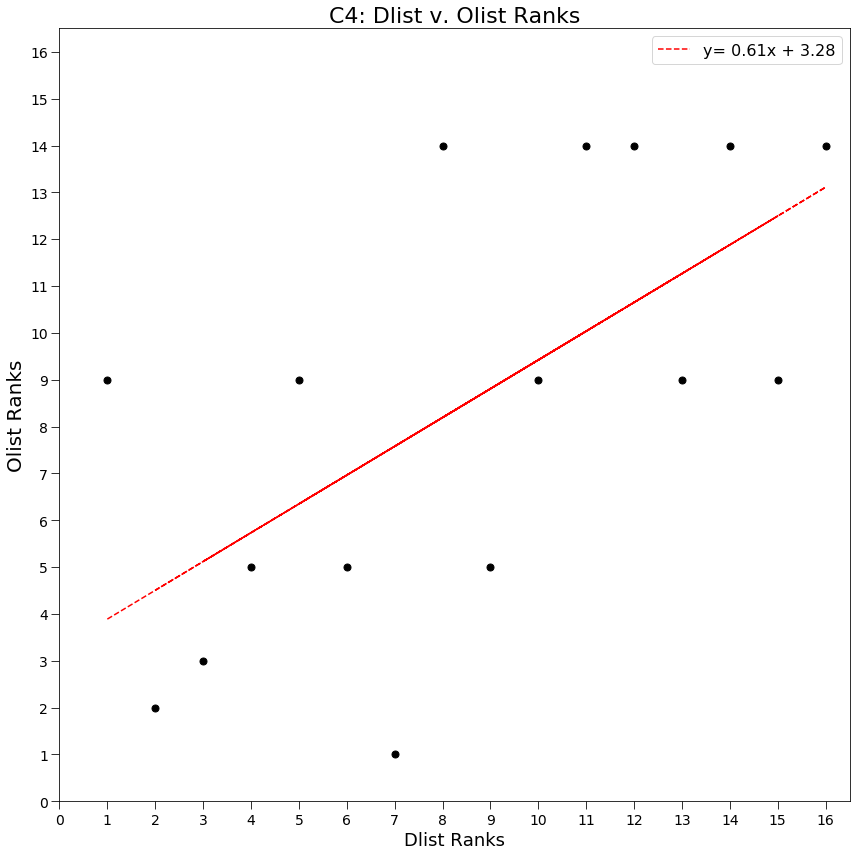

In [25]:
# C4 Dlist v Olist
# fits the data to a line and plots itfig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c4_x, C_df.c4_y, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, C_df.c4_x, C_df.c4_y)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(C_df.c4_x, linear(C_df.c4_x, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C4: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()  
plt.savefig('C4 regression chart.png')

slope = 0.34 (+/-) 0.16
y-intercept = 5.60 (+/-) 1.53


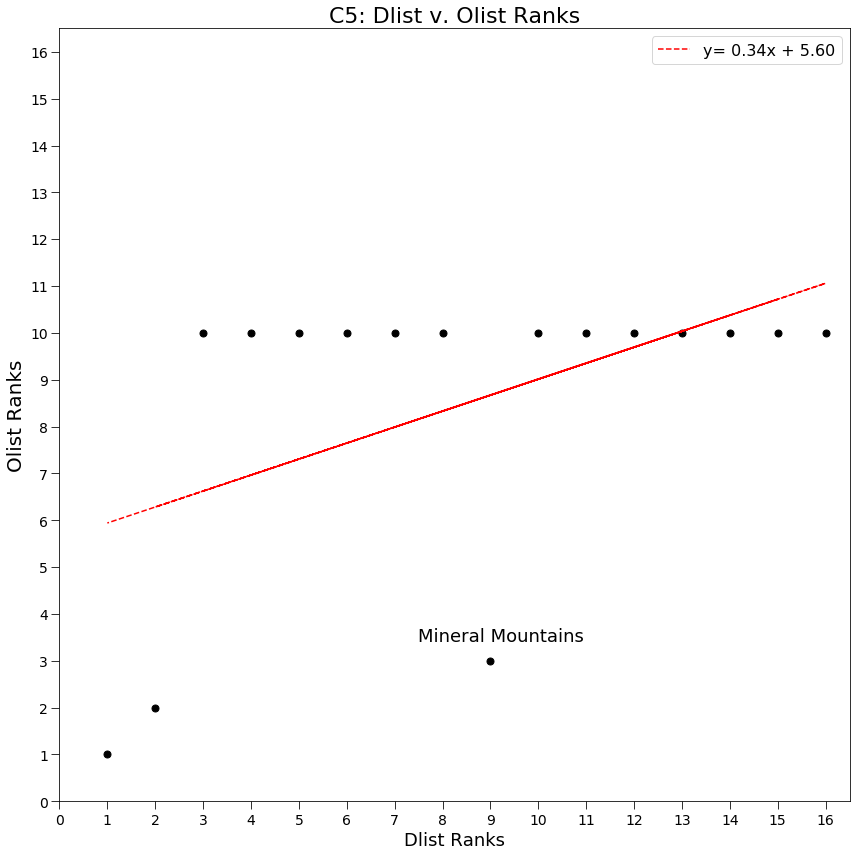

In [26]:
# C5 Dlist v Olist
# fits the data to a line and plots itfig = plt.figure(figsize=(12,12))
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(C_df.c5_x, C_df.c5_y, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, C_df.c5_x, C_df.c5_y)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(C_df.c5_x, linear(C_df.c5_x, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,16.5)
ax1.set_ylim(0,16.5)

ax1.set_title("C5: Dlist v. Olist Ranks", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

plt.annotate("Mineral Mountains",
        (9,3), 
        textcoords="offset points", 
        size=18,
        xytext=(10,20), 
        ha='center')

fig.tight_layout()  
plt.savefig('C5 regression chart.png')

In [27]:
# get the standardized residuals 
C1_influence = C1_model.get_influence()
C1_standardized_residuals = C1_influence.resid_studentized_internal
print(C1_standardized_residuals)

C2_influence = C2_model.get_influence()
C2_standardized_residuals = C2_influence.resid_studentized_internal
print(C2_standardized_residuals)

C3_influence = C3_model.get_influence()
C3_standardized_residuals = C3_influence.resid_studentized_internal
print(C3_standardized_residuals)

C4_influence = C4_model.get_influence()
C4_standardized_residuals = C4_influence.resid_studentized_internal
print(C4_standardized_residuals)

C5_influence = C5_model.get_influence()
C5_standardized_residuals = C5_influence.resid_studentized_internal
print(C5_standardized_residuals)

[ 0.46016173  0.19215461  0.14058173 -0.19215461  0.06083617 -0.14058173
 -0.02054867  0.7192034  -2.15522569  0.97337874 -2.13646518 -0.38913797
  0.97475892  1.73069441  0.45983882 -0.81516881]
[ 2.08155662  0.38439896 -0.72391863 -0.77236249  1.60507223 -0.56473233
  0.30170939  0.62125764 -1.48159292  0.73709326  0.26052973 -1.08198354
 -0.19447171 -0.97117286  0.96940015 -1.10414981]
[-0.41176049  0.26731941 -0.17305487  0.31204464  1.84551243  0.88195435
  0.14549329 -1.30602625 -1.5965146  -1.12970793  0.10237139 -0.79846448
  1.34200995  0.42575214  1.18587583 -1.17168357]
[ 1.58070119 -1.05351625 -0.55656499 -0.62524568 -0.21285703  1.12355254
  0.75899709  0.62524568 -1.85298399  0.95853377  0.27520121 -1.06914586
  1.63076748 -0.65734006 -0.11889256 -0.75479099]
[ 1.26030175 -0.27361999  0.84386026 -1.63274877  0.97563145  0.23206157
  1.11381507 -0.01295134  0.71692678  0.11077038 -0.41432716 -2.01445639
  0.59347056 -0.14052145  0.35217456 -1.93352676]


No handles with labels found to put in legend.


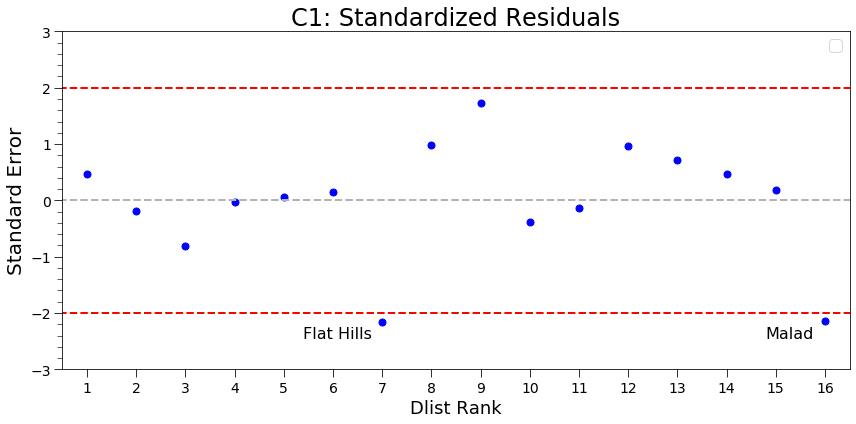

In [28]:
# C1 standardized residuals plot
sres_fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax1 = sres_fig.add_subplot(gs[0])

ax1.plot(C_df.c1_x,C1_standardized_residuals, "bo", markersize=7)    
ax1.plot([0, 16.5], [0, 0], color='0.7', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [2, 2], color='r', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [-2, -2], color='r', linestyle='--', linewidth=2)

ax1.set_xlim(0.5,16.5)
ax1.set_ylim(-3.0,3.0)

ax1.set_title("C1: Standardized Residuals", fontsize=24)
ax1.set_xlabel("Dlist Rank",  fontsize=18)
ax1.set_ylabel("Standard Error",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

sres_fig.tight_layout()

plt.annotate("Flat Hills", 
        (7,-2.1), 
        textcoords="offset points", 
        size=16,
        xytext=(-45,-20), 
        ha='center')   

plt.annotate("Malad", 
        (16,-2.1), 
        textcoords="offset points", 
        size=16,
        xytext=(-35,-20), 
        ha='center') 

plt.savefig('C1 stdres.png')

No handles with labels found to put in legend.


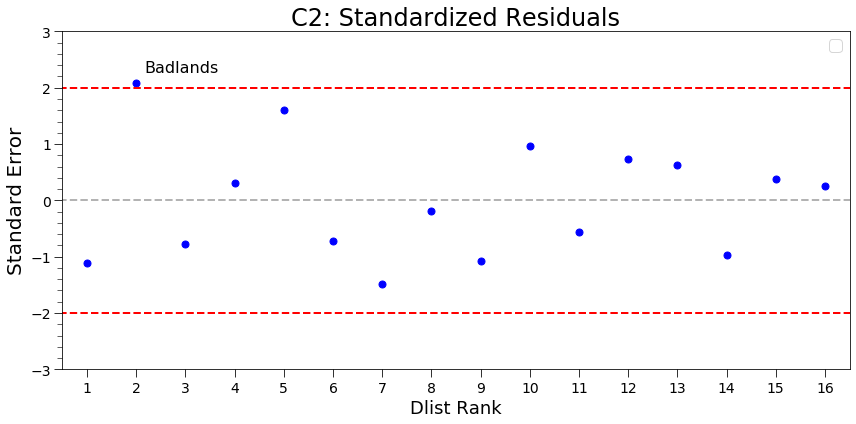

In [29]:
# C2 standardized residuals plot
sres_fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax1 = sres_fig.add_subplot(gs[0])

ax1.plot(C_df.c2_x,C2_standardized_residuals, "bo", markersize=7)    
ax1.plot([0, 16.5], [0, 0], color='0.7', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [2, 2], color='r', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [-2, -2], color='r', linestyle='--', linewidth=2)

ax1.set_xlim(0.5,16.5)
ax1.set_ylim(-3.0,3.0)

ax1.set_title("C2: Standardized Residuals", fontsize=24)
ax1.set_xlabel("Dlist Rank",  fontsize=18)
ax1.set_ylabel("Standard Error",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

sres_fig.tight_layout()

plt.annotate("Badlands", 
        (2,2.1), 
        textcoords="offset points", 
        size=16,
        xytext=(+45,+10), 
        ha='center')     

plt.savefig('C2 stdres.png')

No handles with labels found to put in legend.


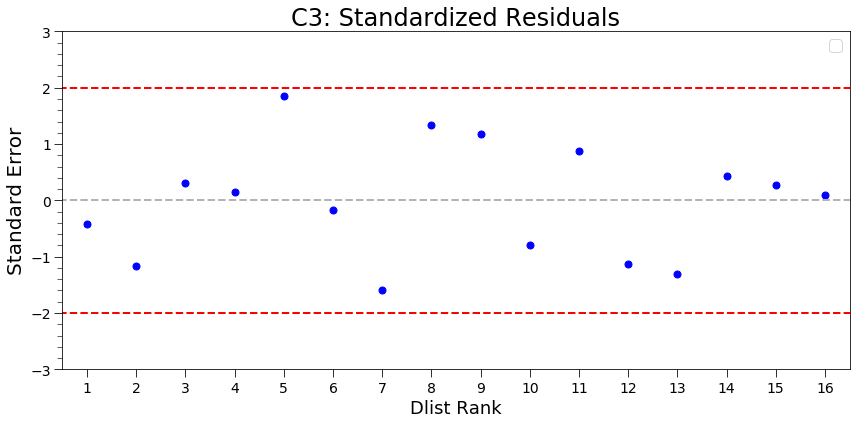

In [30]:
# C3 standardized residuals plot
sres_fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax1 = sres_fig.add_subplot(gs[0])

ax1.plot(C_df.c3_x,C3_standardized_residuals, "bo", markersize=7)    
ax1.plot([0, 16.5], [0, 0], color='0.7', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [2, 2], color='r', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [-2, -2], color='r', linestyle='--', linewidth=2)

ax1.set_xlim(0.5,16.5)
ax1.set_ylim(-3.0,3.0)

ax1.set_title("C3: Standardized Residuals", fontsize=24)
ax1.set_xlabel("Dlist Rank",  fontsize=18)
ax1.set_ylabel("Standard Error",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

sres_fig.tight_layout()

plt.savefig('C3 stdres.png')

No handles with labels found to put in legend.


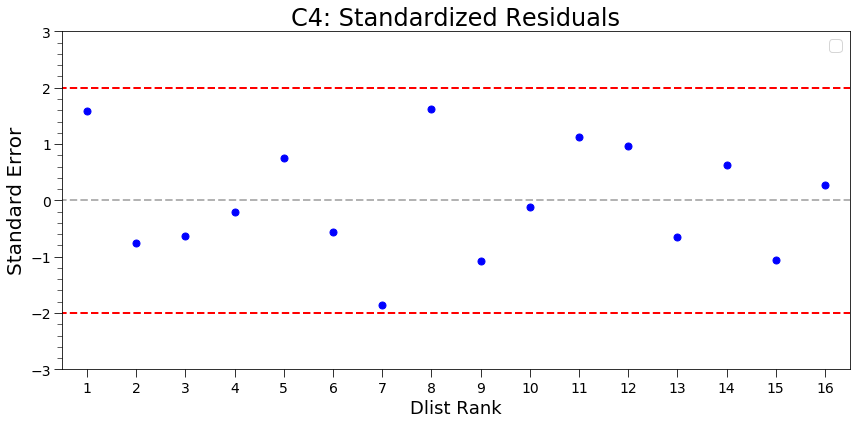

In [31]:
# C4 standardized residuals plot
sres_fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax1 = sres_fig.add_subplot(gs[0])

ax1.plot(C_df.c4_x,C4_standardized_residuals, "bo", markersize=7)    
ax1.plot([0, 16.5], [0, 0], color='0.7', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [2, 2], color='r', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [-2, -2], color='r', linestyle='--', linewidth=2)

ax1.set_xlim(0.5,16.5)
ax1.set_ylim(-3.0,3.0)

ax1.set_title("C4: Standardized Residuals", fontsize=24)
ax1.set_xlabel("Dlist Rank",  fontsize=18)
ax1.set_ylabel("Standard Error",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

sres_fig.tight_layout() 

plt.savefig('C4 stdres.png')

No handles with labels found to put in legend.


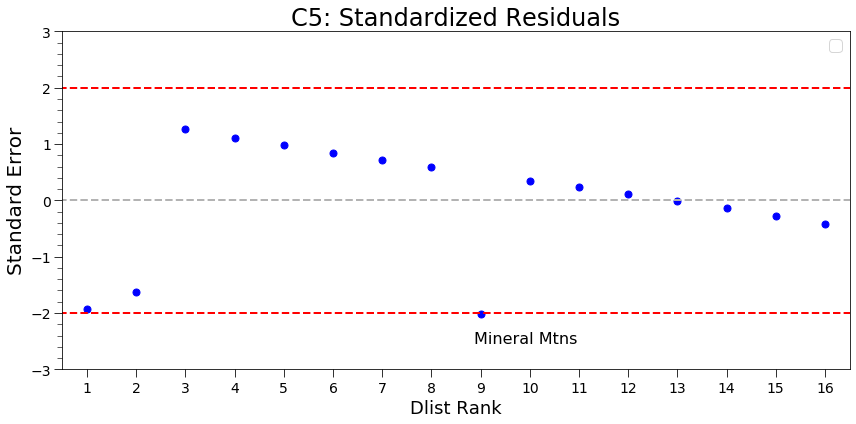

In [32]:
# C5 standardized residuals plot
sres_fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax1 = sres_fig.add_subplot(gs[0])

ax1.plot(C_df.c5_x,C5_standardized_residuals, "bo", markersize=7)    
ax1.plot([0, 16.5], [0, 0], color='0.7', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [2, 2], color='r', linestyle='--', linewidth=2)
ax1.plot([0, 16.5], [-2, -2], color='r', linestyle='--', linewidth=2)

ax1.set_xlim(0.5,16.5)
ax1.set_ylim(-3.0,3.0)

ax1.set_title("C5: Standardized Residuals", fontsize=24)
ax1.set_xlabel("Dlist Rank",  fontsize=18)
ax1.set_ylabel("Standard Error",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)


plt.annotate("Mineral Mtns", 
        (9,-2), 
        textcoords="offset points",
        size=16,
        xytext=(+45,-30), 
        ha='center')   

sres_fig.tight_layout()

plt.savefig('C5 stdres.png')

### Statistical Tests on the Standardized Residuals

In [33]:
print('\033[1m' +"C1 Tests for Standardized Residual Normality" + '\033[0m')
alpha = 0.05
print("Ho (null): The data was produced in a random manner.")
print("Ha (alternative): The data was not produced in a random manner.")
print("  Reject the null hypothesis if p < alpha")
print(' ')

#Perform Runs test
print('\033[1m' + 'Runs Test' + '\033[0m')
print("Purpose: detect non-randomness")
runs_stdRes_zStat, runs_stdRes_zpval = runstest_1samp(C1_standardized_residuals, correction=False)
print('  Test Statistics=%.3f, p=%.3f' % (runs_stdRes_zStat, runs_stdRes_zpval))
if runs_stdRes_zpval > alpha:
    print("  Data appears random (failed to reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
else:
    print("  Data appears non-random (reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
print("-----------------------------------------------------------------")

lil_stdRes_zstat,lil_stdRes_zp = sm.stats.lilliefors(C1_standardized_residuals)
print('\033[1m' + 'Lilliefors Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when pop mean and std dev not known")
print('  Test Statistics=%.3f, p=%.3f' % (lil_stdRes_zstat, lil_stdRes_zp))
if lil_stdRes_zp > alpha:
	print('  C1 residuals look normal (failed to reject Ho)')
else:
	print('  C1 residuals do not look normal (reject Ho)')

print('----------------------------------------------')

# Shapiro-Wilk Test
print('\033[1m' + 'Shapiro-Wilk Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when small sample sizes (<50)")
shap_stdres_stat, shap_stdres_p = shapiro(C1_standardized_residuals)
print('  Test Statistics=%.3f, p=%.3f' % (shap_stdres_stat, shap_stdres_p))
# interpret
if shap_stdres_p > alpha:
	print('  C1 residuals look normal (failed to reject Ho)')
else:
	print('  C1 residuals do not look normal (reject Ho)')

ks_stdRes_zstat,ks_stdRes_zp = sm.stats.diagnostic.kstest_normal(C1_standardized_residuals)
print('\033[1m' + 'Kolmogorov-Smirnov Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (ks_stdRes_zstat, ks_stdRes_zp))
if ks_stdRes_zp > alpha:
	print('  C1 residuals look normal (failed to reject Ho)')
else:
	print('  C1 residuals do not look normal (reject Ho)') 

print('----------------------------------------------')    
    
jb_stdres_stat,jb_stdres_p, xx, yy = sm.stats.stattools.jarque_bera(C1_standardized_residuals)
print('\033[1m' + 'Jarque-Bera Test' + '\033[0m')
print("Purpose: goodness-of-fit test of data's skewness and kurtosis to a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (jb_stdres_stat, jb_stdres_p))
if jb_stdres_p > alpha:
	print('  C1 residuals look normal (failed to reject Ho)')
else:
	print('  C1 residuals do not look normal (reject Ho)')

print('----------------------------------------------')  
    
    

C1 Tests for Standardized Residual Normality
Ho (null): The data was produced in a random manner.
Ha (alternative): The data was not produced in a random manner.
  Reject the null hypothesis if p < alpha
 
Runs Test
Purpose: detect non-randomness
  Test Statistics=0.592, p=0.554
  Data appears random (failed to reject Ho)
-----------------------------------------------------------------
Lilliefors Test
Purpose: test that data come from a normal distribution when pop mean and std dev not known
  Test Statistics=0.179, p=0.190
  C1 residuals look normal (failed to reject Ho)
----------------------------------------------
Shapiro-Wilk Test
Purpose: test that data come from a normal distribution when small sample sizes (<50)
  Test Statistics=0.915, p=0.141
  C1 residuals look normal (failed to reject Ho)
Kolmogorov-Smirnov Test
Purpose: test that data come from a normal distribution
  Test Statistics=0.179, p=0.190
  C1 residuals look normal (failed to reject Ho)
-------------------------

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


In [34]:
print('\033[1m' +"C2 Tests for Standardized Residual Normality" + '\033[0m')
alpha = 0.05
print("Ho (null): The data was produced in a random manner.")
print("Ha (alternative): The data was not produced in a random manner.")
print("  Reject the null hypothesis if p < alpha")
print(' ')

#Perform Runs test
print('\033[1m' + 'Runs Test' + '\033[0m')
print("Purpose: detect non-randomness")
runs_stdRes_zStat, runs_stdRes_zpval = runstest_1samp(C2_standardized_residuals, correction=False)
print('  Test Statistics=%.3f, p=%.3f' % (runs_stdRes_zStat, runs_stdRes_zpval))
if runs_stdRes_zpval > alpha:
    print("  Data appears random (failed to reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
else:
    print("  Data appears non-random (reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
print("-----------------------------------------------------------------")

lil_stdRes_zstat,lil_stdRes_zp = sm.stats.lilliefors(C2_standardized_residuals)
print('\033[1m' + 'Lilliefors Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when pop mean and std dev not known")
print('  Test Statistics=%.3f, p=%.3f' % (lil_stdRes_zstat, lil_stdRes_zp))
if lil_stdRes_zp > alpha:
	print('  C2 residuals look normal (failed to reject Ho)')
else:
	print('  C2 residuals do not look normal (reject Ho)')

print('----------------------------------------------')

# Shapiro-Wilk Test
print('\033[1m' + 'Shapiro-Wilk Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when small sample sizes (<50)")
shap_stdres_stat, shap_stdres_p = shapiro(C2_standardized_residuals)
print('  Test Statistics=%.3f, p=%.3f' % (shap_stdres_stat, shap_stdres_p))
# interpret
if shap_stdres_p > alpha:
	print('  C2 residuals look normal (failed to reject Ho)')
else:
	print('  C2 residuals do not look normal (reject Ho)')

ks_stdRes_zstat,ks_stdRes_zp = sm.stats.diagnostic.kstest_normal(C2_standardized_residuals)
print('\033[1m' + 'Kolmogorov-Smirnov Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (ks_stdRes_zstat, ks_stdRes_zp))
if ks_stdRes_zp > alpha:
	print('  C2 residuals look normal (failed to reject Ho)')
else:
	print('  C2 residuals do not look normal (reject Ho)') 

print('----------------------------------------------')    
    
jb_stdres_stat,jb_stdres_p, xx, yy = sm.stats.stattools.jarque_bera(C2_standardized_residuals)
print('\033[1m' + 'Jarque-Bera Test' + '\033[0m')
print("Purpose: goodness-of-fit test of data's skewness and kurtosis to a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (jb_stdres_stat, jb_stdres_p))
if jb_stdres_p > alpha:
	print('  C2 residuals look normal (failed to reject Ho)')
else:
	print('  C2 residuals do not look normal (reject Ho)')

print('----------------------------------------------') 

C2 Tests for Standardized Residual Normality
Ho (null): The data was produced in a random manner.
Ha (alternative): The data was not produced in a random manner.
  Reject the null hypothesis if p < alpha
 
Runs Test
Purpose: detect non-randomness
  Test Statistics=0.518, p=0.605
  Data appears random (failed to reject Ho)
-----------------------------------------------------------------
Lilliefors Test
Purpose: test that data come from a normal distribution when pop mean and std dev not known
  Test Statistics=0.146, p=0.472
  C2 residuals look normal (failed to reject Ho)
----------------------------------------------
Shapiro-Wilk Test
Purpose: test that data come from a normal distribution when small sample sizes (<50)
  Test Statistics=0.953, p=0.531
  C2 residuals look normal (failed to reject Ho)
Kolmogorov-Smirnov Test
Purpose: test that data come from a normal distribution
  Test Statistics=0.146, p=0.472
  C2 residuals look normal (failed to reject Ho)
-------------------------

In [35]:
print('\033[1m' +"C3 Tests for Standardized Residual Normality" + '\033[0m')
alpha = 0.05
print("Ho (null): The data was produced in a random manner.")
print("Ha (alternative): The data was not produced in a random manner.")
print("  Reject the null hypothesis if p < alpha")
print(' ')

#Perform Runs test
print('\033[1m' + 'Runs Test' + '\033[0m')
print("Purpose: detect non-randomness")
runs_stdRes_zStat, runs_stdRes_zpval = runstest_1samp(C3_standardized_residuals, correction=False)
print('  Test Statistics=%.3f, p=%.3f' % (runs_stdRes_zStat, runs_stdRes_zpval))
if runs_stdRes_zpval > alpha:
    print("  Data appears random (failed to reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
else:
    print("  Data appears non-random (reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
print("-----------------------------------------------------------------")

lil_stdRes_zstat,lil_stdRes_zp = sm.stats.lilliefors(C3_standardized_residuals)
print('\033[1m' + 'Lilliefors Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when pop mean and std dev not known")
print('  Test Statistics=%.3f, p=%.3f' % (lil_stdRes_zstat, lil_stdRes_zp))
if lil_stdRes_zp > alpha:
	print('  C3 residuals look normal (failed to reject Ho)')
else:
	print('  C3 residuals do not look normal (reject Ho)')

print('----------------------------------------------')

# Shapiro-Wilk Test
print('\033[1m' + 'Shapiro-Wilk Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when small sample sizes (<50)")
shap_stdres_stat, shap_stdres_p = shapiro(C3_standardized_residuals)
print('  Test Statistics=%.3f, p=%.3f' % (shap_stdres_stat, shap_stdres_p))
# interpret
if shap_stdres_p > alpha:
	print('  C3 residuals look normal (failed to reject Ho)')
else:
	print('  C3 residuals do not look normal (reject Ho)')

ks_stdRes_zstat,ks_stdRes_zp = sm.stats.diagnostic.kstest_normal(C3_standardized_residuals)
print('\033[1m' + 'Kolmogorov-Smirnov Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (ks_stdRes_zstat, ks_stdRes_zp))
if ks_stdRes_zp > alpha:
	print('  C3 residuals look normal (failed to reject Ho)')
else:
	print('  C3 residuals do not look normal (reject Ho)') 

print('----------------------------------------------')    
    
jb_stdres_stat,jb_stdres_p, xx, yy = sm.stats.stattools.jarque_bera(C3_standardized_residuals)
print('\033[1m' + 'Jarque-Bera Test' + '\033[0m')
print("Purpose: goodness-of-fit test of data's skewness and kurtosis to a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (jb_stdres_stat, jb_stdres_p))
if jb_stdres_p > alpha:
	print('  C3 residuals look normal (failed to reject Ho)')
else:
	print('  C3 residuals do not look normal (reject Ho)')

print('----------------------------------------------') 

C3 Tests for Standardized Residual Normality
Ho (null): The data was produced in a random manner.
Ha (alternative): The data was not produced in a random manner.
  Reject the null hypothesis if p < alpha
 
Runs Test
Purpose: detect non-randomness
  Test Statistics=0.066, p=0.948
  Data appears random (failed to reject Ho)
-----------------------------------------------------------------
Lilliefors Test
Purpose: test that data come from a normal distribution when pop mean and std dev not known
  Test Statistics=0.116, p=0.809
  C3 residuals look normal (failed to reject Ho)
----------------------------------------------
Shapiro-Wilk Test
Purpose: test that data come from a normal distribution when small sample sizes (<50)
  Test Statistics=0.967, p=0.784
  C3 residuals look normal (failed to reject Ho)
Kolmogorov-Smirnov Test
Purpose: test that data come from a normal distribution
  Test Statistics=0.116, p=0.809
  C3 residuals look normal (failed to reject Ho)
-------------------------

In [36]:
print('\033[1m' +"C4 Tests for Standardized Residual Normality" + '\033[0m')
alpha = 0.05
print("Ho (null): The data was produced in a random manner.")
print("Ha (alternative): The data was not produced in a random manner.")
print("  Reject the null hypothesis if p < alpha")
print(' ')

#Perform Runs test
print('\033[1m' + 'Runs Test' + '\033[0m')
print("Purpose: detect non-randomness")
runs_stdRes_zStat, runs_stdRes_zpval = runstest_1samp(C4_standardized_residuals, correction=False)
print('  Test Statistics=%.3f, p=%.3f' % (runs_stdRes_zStat, runs_stdRes_zpval))
if runs_stdRes_zpval > alpha:
    print("  Data appears random (failed to reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
else:
    print("  Data appears non-random (reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
print("-----------------------------------------------------------------")

lil_stdRes_zstat,lil_stdRes_zp = sm.stats.lilliefors(C4_standardized_residuals)
print('\033[1m' + 'Lilliefors Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when pop mean and std dev not known")
print('  Test Statistics=%.3f, p=%.3f' % (lil_stdRes_zstat, lil_stdRes_zp))
if lil_stdRes_zp > alpha:
	print('  C4 residuals look normal (failed to reject Ho)')
else:
	print('  C4 residuals do not look normal (reject Ho)')

print('----------------------------------------------')

# Shapiro-Wilk Test
print('\033[1m' + 'Shapiro-Wilk Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when small sample sizes (<50)")
shap_stdres_stat, shap_stdres_p = shapiro(C4_standardized_residuals)
print('  Test Statistics=%.3f, p=%.3f' % (shap_stdres_stat, shap_stdres_p))
# interpret
if shap_stdres_p > alpha:
	print('  C4 residuals look normal (failed to reject Ho)')
else:
	print('  C4 residuals do not look normal (reject Ho)')

ks_stdRes_zstat,ks_stdRes_zp = sm.stats.diagnostic.kstest_normal(C4_standardized_residuals)
print('\033[1m' + 'Kolmogorov-Smirnov Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (ks_stdRes_zstat, ks_stdRes_zp))
if ks_stdRes_zp > alpha:
	print('  C4 residuals look normal (failed to reject Ho)')
else:
	print('  C4 residuals do not look normal (reject Ho)') 

print('----------------------------------------------')    
    
jb_stdres_stat,jb_stdres_p, xx, yy = sm.stats.stattools.jarque_bera(C4_standardized_residuals)
print('\033[1m' + 'Jarque-Bera Test' + '\033[0m')
print("Purpose: goodness-of-fit test of data's skewness and kurtosis to a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (jb_stdres_stat, jb_stdres_p))
if jb_stdres_p > alpha:
	print('  C4 residuals look normal (failed to reject Ho)')
else:
	print('  C4 residuals do not look normal (reject Ho)')

print('----------------------------------------------') 

C4 Tests for Standardized Residual Normality
Ho (null): The data was produced in a random manner.
Ha (alternative): The data was not produced in a random manner.
  Reject the null hypothesis if p < alpha
 
Runs Test
Purpose: detect non-randomness
  Test Statistics=-0.461, p=0.645
  Data appears random (failed to reject Ho)
-----------------------------------------------------------------
Lilliefors Test
Purpose: test that data come from a normal distribution when pop mean and std dev not known
  Test Statistics=0.145, p=0.487
  C4 residuals look normal (failed to reject Ho)
----------------------------------------------
Shapiro-Wilk Test
Purpose: test that data come from a normal distribution when small sample sizes (<50)
  Test Statistics=0.959, p=0.643
  C4 residuals look normal (failed to reject Ho)
Kolmogorov-Smirnov Test
Purpose: test that data come from a normal distribution
  Test Statistics=0.145, p=0.487
  C4 residuals look normal (failed to reject Ho)
------------------------

In [37]:
print('\033[1m' +"C5 Tests for Standardized Residual Normality" + '\033[0m')
alpha = 0.05
print("Ho (null): The data was produced in a random manner.")
print("Ha (alternative): The data was not produced in a random manner.")
print("  Reject the null hypothesis if p < alpha")
print(' ')

#Perform Runs test
print('\033[1m' + 'Runs Test' + '\033[0m')
print("Purpose: detect non-randomness")
runs_stdRes_zStat, runs_stdRes_zpval = runstest_1samp(C5_standardized_residuals, correction=False)
print('  Test Statistics=%.3f, p=%.3f' % (runs_stdRes_zStat, runs_stdRes_zpval))
if runs_stdRes_zpval > alpha:
    print("  Data appears random (failed to reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
else:
    print("  Data appears non-random (reject Ho)".format(round(runs_stdRes_zpval,4), alpha))
print("-----------------------------------------------------------------")

lil_stdRes_zstat,lil_stdRes_zp = sm.stats.lilliefors(C5_standardized_residuals)
print('\033[1m' + 'Lilliefors Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when pop mean and std dev not known")
print('  Test Statistics=%.3f, p=%.3f' % (lil_stdRes_zstat, lil_stdRes_zp))
if lil_stdRes_zp > alpha:
	print('  C5 residuals look normal (failed to reject Ho)')
else:
	print('  C5 residuals do not look normal (reject Ho)')

print('----------------------------------------------')

# Shapiro-Wilk Test
print('\033[1m' + 'Shapiro-Wilk Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution when small sample sizes (<50)")
shap_stdres_stat, shap_stdres_p = shapiro(C5_standardized_residuals)
print('  Test Statistics=%.3f, p=%.3f' % (shap_stdres_stat, shap_stdres_p))
# interpret
if shap_stdres_p > alpha:
	print('  C5 residuals look normal (failed to reject Ho)')
else:
	print('  C5 residuals do not look normal (reject Ho)')

ks_stdRes_zstat,ks_stdRes_zp = sm.stats.diagnostic.kstest_normal(C5_standardized_residuals)
print('\033[1m' + 'Kolmogorov-Smirnov Test' + '\033[0m')
print("Purpose: test that data come from a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (ks_stdRes_zstat, ks_stdRes_zp))
if ks_stdRes_zp > alpha:
	print('  C5 residuals look normal (failed to reject Ho)')
else:
	print('  C5 residuals do not look normal (reject Ho)') 

print('----------------------------------------------')    
    
jb_stdres_stat,jb_stdres_p, xx, yy = sm.stats.stattools.jarque_bera(C5_standardized_residuals)
print('\033[1m' + 'Jarque-Bera Test' + '\033[0m')
print("Purpose: goodness-of-fit test of data's skewness and kurtosis to a normal distribution")
print('  Test Statistics=%.3f, p=%.3f' % (jb_stdres_stat, jb_stdres_p))
if jb_stdres_p > alpha:
	print('  C5 residuals look normal (failed to reject Ho)')
else:
	print('  C5 residuals do not look normal (reject Ho)')

print('----------------------------------------------') 

C5 Tests for Standardized Residual Normality
Ho (null): The data was produced in a random manner.
Ha (alternative): The data was not produced in a random manner.
  Reject the null hypothesis if p < alpha
 
Runs Test
Purpose: detect non-randomness
  Test Statistics=0.832, p=0.405
  Data appears random (failed to reject Ho)
-----------------------------------------------------------------
Lilliefors Test
Purpose: test that data come from a normal distribution when pop mean and std dev not known
  Test Statistics=0.163, p=0.309
  C5 residuals look normal (failed to reject Ho)
----------------------------------------------
Shapiro-Wilk Test
Purpose: test that data come from a normal distribution when small sample sizes (<50)
  Test Statistics=0.888, p=0.051
  C5 residuals look normal (failed to reject Ho)
Kolmogorov-Smirnov Test
Purpose: test that data come from a normal distribution
  Test Statistics=0.163, p=0.309
  C5 residuals look normal (failed to reject Ho)
-------------------------

## Plot the Landscape Learning results

%LL = (1 - r^2)   Calculations and group ages are described in my dissertation, Chapter 5

In [38]:
C_LL = [75, 59.6, 64.3, 74.8, 39.6]
C_dates = [9050, 9300, 9750, 10050, 10650]

#create dataset
Cgrp_df = pd.DataFrame({'C_LL': C_LL,
                        'C_dates': C_dates})
#view dataset
Cgrp_df

,C_LL,C_dates
0,75.0,9050
1,59.6,9300
2,64.3,9750
3,74.8,10050
4,39.6,10650


slope = -0.02 (+/-) 0.01
y-intercept = 212.08 (+/-) 97.02


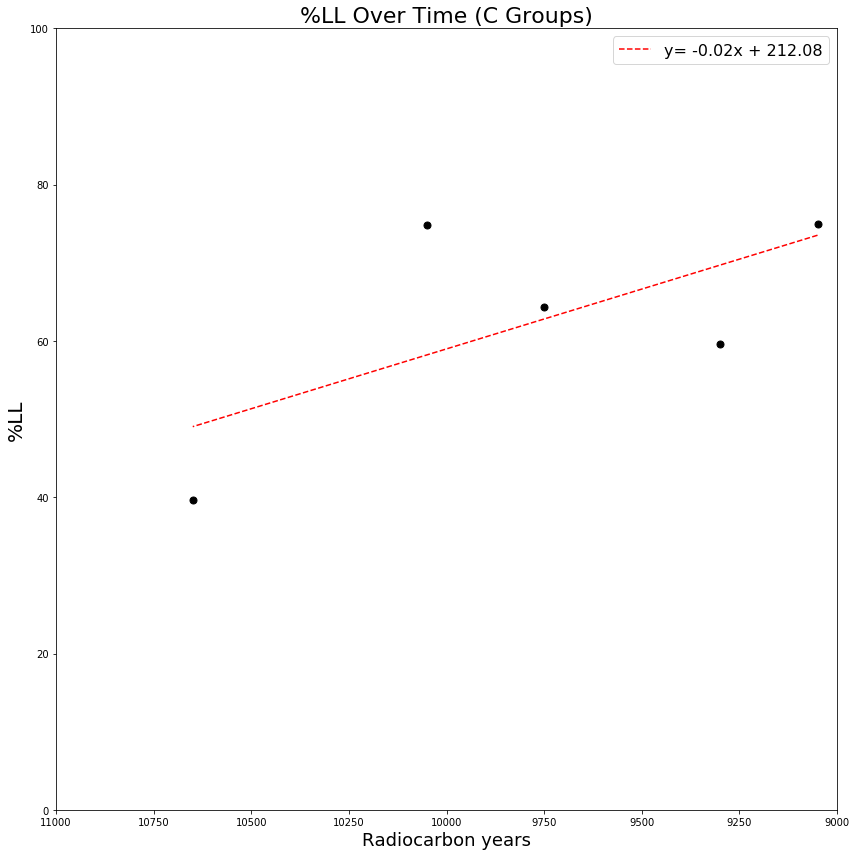

In [39]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(Cgrp_df.C_dates, Cgrp_df.C_LL, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, Cgrp_df.C_dates, Cgrp_df.C_LL)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(Cgrp_df.C_dates, linear(Cgrp_df.C_dates, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(11000,9000)
ax1.set_ylim(0,100)

ax1.set_title("%LL Over Time (C Groups)", fontsize=22)
ax1.set_ylabel("%LL",  fontsize=20)
ax1.set_xlabel("Radiocarbon years",  fontsize=18)
ax1.legend(loc='best', fontsize=16)

fig.tight_layout()
   
plt.savefig('C LL.png')

In [40]:
C_pearson_r, C_pearson_r_pval = stats.pearsonr(C_LL, C_dates)
print("C Pearson's r:          ", str(round(C_pearson_r, 3)))
print("C Pearson's r, p value: ", str(round(C_pearson_r_pval, 4)))
print("--------------------------------")

C Pearson's r:           -0.665
C Pearson's r, p value:  0.2206
--------------------------------


In [41]:
C_spearman_r, C_spearman_r_pval = stats.spearmanr(C_LL, C_dates)
print("C Spearman's r:          ", str(round(C_spearman_r, 3)))
print("C Spearman's r, p value: ", str(round(C_spearman_r_pval, 4)))

C Spearman's r:           -0.6
C Spearman's r, p value:  0.2848


In [42]:
#fit multiple linear regression model
C_model = ols('C_LL ~ C_dates', data=Cgrp_df).fit()

#view model summary
print(C_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   C_LL   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     2.380
Date:                Thu, 16 Dec 2021   Prob (F-statistic):              0.221
Time:                        13:13:45   Log-Likelihood:                -18.455
No. Observations:                   5   AIC:                             40.91
Df Residuals:                       3   BIC:                             40.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    212.0824     97.016      2.186      0.1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


### Running the same regression and stats tests using calender years instead of radiocarbon years.

In [44]:
C_LL = [75, 59.6, 64.3, 74.8, 39.6]
Ccal_dates = [8351, 8647, 9306, 9816, 10786]

#create dataset
Ccal_df = pd.DataFrame({'C_LL': C_LL,
                     'Ccal_dates': Ccal_dates})
#view dataset
Ccal_df

,C_LL,Ccal_dates
0,75.0,8351
1,59.6,8647
2,64.3,9306
3,74.8,9816
4,39.6,10786


slope = -0.01 (+/-) 0.01
y-intercept = 156.52 (+/-) 60.50


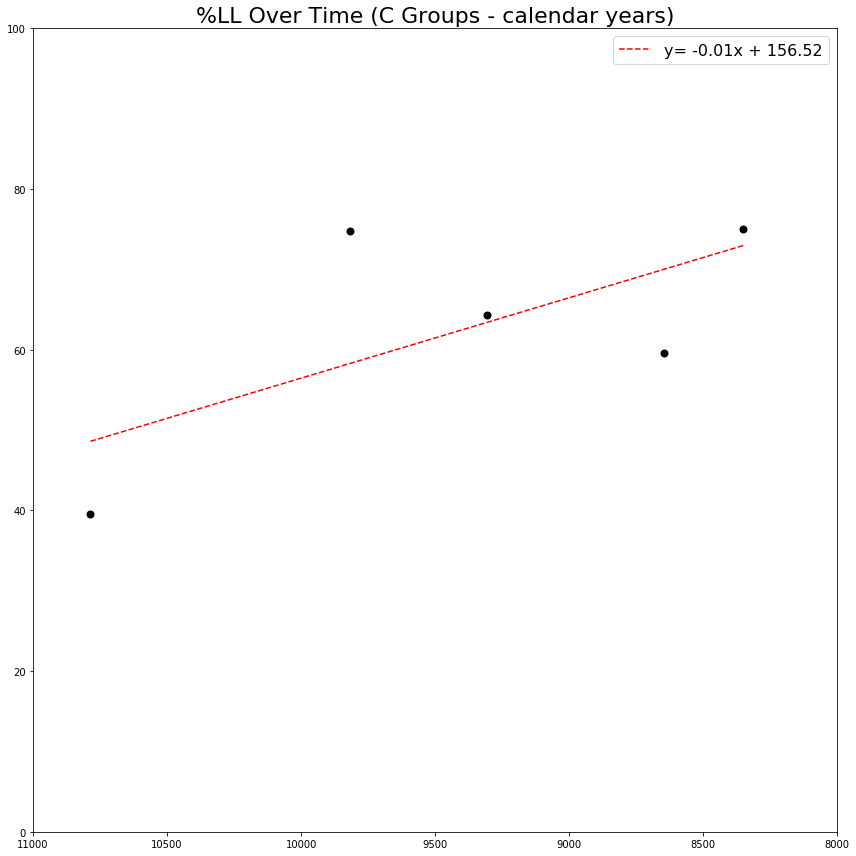

In [49]:
# fits the data to a line and plots it
# dist: x variables, independent, distance from Home to patch
# tally: y variables, dependent, tally of encounters with the patch during 100 walks
# label: patch name to title the graph and create the filename    

fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(Ccal_df.Ccal_dates, Ccal_df.C_LL, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, Ccal_df.Ccal_dates, Ccal_df.C_LL)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(Ccal_df.Ccal_dates, linear(Ccal_df.Ccal_dates, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(11000,8000)
ax1.set_ylim(0,100)

ax1.set_title("%LL Over Time (C Groups - calendar years)", fontsize=22)

ax1.legend(loc='best', fontsize=16)

fig.tight_layout()
   
plt.savefig('Ccal LL.png')

In [50]:
#fit multiple linear regression model
Ccal_model = ols('C_LL ~ Ccal_dates', data=Ccal_df).fit()

#view model summary
print(Ccal_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   C_LL   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     2.428
Date:                Thu, 16 Dec 2021   Prob (F-statistic):              0.217
Time:                        13:16:03   Log-Likelihood:                -18.433
No. Observations:                   5   AIC:                             40.87
Df Residuals:                       3   BIC:                             40.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    156.5224     60.500      2.587      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [51]:
Ccal_pearson_r, Ccal_pearson_r_pval = stats.pearsonr(C_LL, Ccal_dates)
print("Ccal Pearson's r:          ", str(round(Ccal_pearson_r, 3)))
print("Ccal Pearson's r, p value: ", str(round(Ccal_pearson_r_pval, 4)))
print("--------------------------------")

Ccal Pearson's r:           -0.669
Ccal Pearson's r, p value:  0.2171
--------------------------------


In [52]:
Ccal_spearman_r, Ccal_spearman_r_pval = stats.spearmanr(C_LL, Ccal_dates)
print("Ccal Spearman's r:          ", str(round(Ccal_spearman_r, 3)))
print("Ccal Spearman's r, p value: ", str(round(Ccal_spearman_r_pval, 4)))
print("--------------------------------")

Ccal Spearman's r:           -0.6
Ccal Spearman's r, p value:  0.2848
--------------------------------


## Results after removing the Flat Hills outlier

In [54]:
# rank order of index list by Discoverability, Flat Hills removed
c1_dlist = np.array([1,14,6,2,5,10,4,12,11,15,9,7,8,13,3])
c1_olist = np.array([3,13,6,2,5,9,4,13,13,7.5,7.5,10,13,13,1])

c2_dlist = np.array([2,14,6,3,5,10,4,12,11,15,8,7,13,9,1])
c2_olist = np.array([12,12,3.5,2,12, 6.5,6.5,12,12,12,3.5,6.5,6.5,12,1])

c3_dlist = np.array([1,14,6,3,5,10,4,12,11,15,9,7,13,8,2])
c3_olist = np.array([2,12,5.5,5.5,12,12,5.5,5.5,5.5,12,5.5,12,12,12,1])

c4_dlist = np.array([1,14,6,3,4,10,5,13,11,15,8,7,12,9,2])
c4_olist = np.array([8,8,4,2,4,13,8,13,13,13,4,13,8,8,1])

c5_dlist = np.array([3,14,6,2,5,10,4,12,11,15,8,7,13,9,1])
c5_olist = np.array([9.5,9.5,9.5,2,9.5,9.5,9.5,9.5,9.5,9.5,3,9.5,9.5,9.5,1])

In [55]:
c1o_pearson_r, c1o_pearson_r_pval = stats.pearsonr(c1_dlist, c1_olist)
print("C1 Pearson's r:          ", str(round(c1o_pearson_r, 3)))
print("C1 Pearson's r, p value: ", str(round(c1o_pearson_r_pval, 8)))
c1o_pearson_coeff = c1o_pearson_r ** 2
print("C1 coeff:                ", round(c1o_pearson_coeff,3))
print("--------------------------------")

c2o_pearson_r, c2o_pearson_r_pval = stats.pearsonr(c2_dlist, c2_olist)
print("C2 Pearson's r:          ", str(round(c2o_pearson_r, 3)))
print("C2 Pearson's r, p value: ", str(round(c2o_pearson_r_pval, 8)))
c2o_pearson_coeff = c2o_pearson_r ** 2
print("C2 coeff:                ", round(c2o_pearson_coeff,3))
print("--------------------------------")

c3o_pearson_r, c3o_pearson_r_pval = stats.pearsonr(c3_dlist, c3_olist)
print("C3 Pearson's r:          ", str(round(c3o_pearson_r, 3)))
print("C3 Pearson's r, p value: ", str(round(c3o_pearson_r_pval, 8)))
c3o_pearson_coeff = c3o_pearson_r ** 2
print("C3 coeff:                ", round(c3o_pearson_coeff,3))
print("--------------------------------")

c4o_pearson_r, c4o_pearson_r_pval = stats.pearsonr(c4_dlist, c4_olist)
print("C4 Pearson's r:          ", str(round(c4o_pearson_r, 3)))
print("C4 Pearson's r, p value: ", str(round(c4o_pearson_r_pval, 8)))
c4o_pearson_coeff = c4o_pearson_r ** 2
print("C4 coeff:                ", round(c4o_pearson_coeff,3))
print("--------------------------------")

c5o_pearson_r, c5o_pearson_r_pval = stats.pearsonr(c5_dlist, c5_olist)
print("C5 Pearson's r:          ", str(round(c5o_pearson_r, 3)))
print("C5 Pearson's r, p value: ", str(round(c5o_pearson_r_pval, 8)))
c5o_pearson_coeff = c5o_pearson_r ** 2
print("C5 coeff:                ", round(c5o_pearson_coeff,3))
print("--------------------------------")

C1 Pearson's r:           0.805
C1 Pearson's r, p value:  0.00029853
C1 coeff:                 0.647
--------------------------------
C2 Pearson's r:           0.506
C2 Pearson's r, p value:  0.05415697
C2 coeff:                 0.256
--------------------------------
C3 Pearson's r:           0.607
C3 Pearson's r, p value:  0.01644774
C3 coeff:                 0.368
--------------------------------
C4 Pearson's r:           0.655
C4 Pearson's r, p value:  0.00806678
C4 coeff:                 0.429
--------------------------------
C5 Pearson's r:           0.534
C5 Pearson's r, p value:  0.04052488
C5 coeff:                 0.285
--------------------------------


In [56]:
c1o_spearman_r, c1o_spearman_r_pval = stats.spearmanr(c1_dlist, c1_olist)
print("C1 Spearman's r:          ", str(round(c1o_spearman_r, 3)))
print("C1 Spearman's r, p value: ", str(round(c1o_spearman_r_pval, 8)))
c1o_spearman_coeff = c1o_spearman_r ** 2
print("C1 coeff:                 ", round(c1o_spearman_coeff,3))
print("C1 LL:                    ", round((1-c1o_spearman_coeff)*100,1))
print("--------------------------------")

c2o_spearman_r, c2o_spearman_r_pval = stats.spearmanr(c2_dlist, c2_olist)
print("C2 Spearman's r:          ", str(round(c2o_spearman_r, 3)))
print("C2 Spearman's r, p value: ", str(round(c2o_spearman_r_pval, 8)))
c2o_spearman_coeff = c2o_spearman_r ** 2
print("C2 coeff:                 ", round(c2o_spearman_coeff,3))
print("C2 LL:                    ", round((1-c2o_spearman_coeff)*100,1))
print("--------------------------------")

c3o_spearman_r, c3o_spearman_r_pval = stats.spearmanr(c3_dlist, c3_olist)
print("C3 Spearman's r:          ", str(round(c3o_spearman_r, 3)))
print("C3 Spearman's r, p value: ", str(round(c3o_spearman_r_pval, 8)))
c3o_spearman_coeff = c3o_spearman_r ** 2
print("C3 coeff:                 ", round(c3o_spearman_coeff,3))
print("C3 LL:                    ", round((1-c3o_spearman_coeff)*100,1))
print("--------------------------------")

c4o_spearman_r, c4o_spearman_r_pval = stats.spearmanr(c4_dlist, c4_olist)
print("C4 Spearman's r:          ", str(round(c4o_spearman_r, 3)))
print("C4 Spearman's r, p value: ", str(round(c4o_spearman_r_pval, 8)))
c4o_spearman_coeff = c4o_spearman_r ** 2
print("C4 coeff:                 ", round(c4o_spearman_coeff,3))
print("C4 LL:                    ", round((1-c4o_spearman_coeff)*100,1))
print("--------------------------------")

c5o_spearman_r, c5o_spearman_r_pval = stats.spearmanr(c5_dlist, c5_olist)
print("C5 Spearman's r:          ", str(round(c5o_spearman_r, 3)))
print("C5 Spearman's r, p value: ", str(round(c5o_spearman_r_pval, 8)))
c5o_spearman_coeff = c5o_spearman_r ** 2
print("C5 coeff:                 ", round(c5o_spearman_coeff,3))
print("C5 LL:                    ", round((1-c5o_spearman_coeff)*100,1))
print("--------------------------------")

C1 Spearman's r:           0.805
C1 Spearman's r, p value:  0.00029853
C1 coeff:                  0.647
C1 LL:                     35.3
--------------------------------
C2 Spearman's r:           0.506
C2 Spearman's r, p value:  0.05415697
C2 coeff:                  0.256
C2 LL:                     74.4
--------------------------------
C3 Spearman's r:           0.607
C3 Spearman's r, p value:  0.01644774
C3 coeff:                  0.368
C3 LL:                     63.2
--------------------------------
C4 Spearman's r:           0.655
C4 Spearman's r, p value:  0.00806678
C4 coeff:                  0.429
C4 LL:                     57.1
--------------------------------
C5 Spearman's r:           0.534
C5 Spearman's r, p value:  0.04052488
C5 coeff:                  0.285
C5 LL:                     71.5
--------------------------------


In [57]:
c1_dlist = np.array([1,14,6,2,5,10,4,12,11,15,9,7,8,13,3]).reshape((-1, 1))
c1_olist = np.array([3,13,6,2,5,9,4,13,13,7.5,7.5,10,13,13,1]).reshape((-1, 1))

c2_dlist = np.array([2,14,6,3,5,10,4,12,11,15,8,7,13,9,1]).reshape((-1, 1))
c2_olist = np.array([12,12,3.5,2,12, 6.5,6.5,12,12,12,3.5,6.5,6.5,12,1]).reshape((-1, 1))

c3_dlist = np.array([1,14,6,3,5,10,4,12,11,15,9,7,13,8,2]).reshape((-1, 1))
c3_olist = np.array([2,12,5.5,5.5,12,12,5.5,5.5,5.5,12,5.5,12,12,12,1]).reshape((-1, 1))

c4_dlist = np.array([1,14,6,3,4,10,5,13,11,15,8,7,12,9,2]).reshape((-1, 1))
c4_olist = np.array([8,8,4,2,4,13,8,13,13,13,4,13,8,8,1]).reshape((-1, 1))

c5_dlist = np.array([3,14,6,2,5,10,4,12,11,15,8,7,13,9,1]).reshape((-1, 1))
c5_olist = np.array([9.5,9.5,9.5,2,9.5,9.5,9.5,9.5,9.5,9.5,3,9.5,9.5,9.5,1]).reshape((-1, 1))

c1_d = list(np.concatenate(c1_dlist).flat)
c1_o = list(np.concatenate(c1_olist).flat)
c2_d = list(np.concatenate(c2_dlist).flat)
c2_o = list(np.concatenate(c2_olist).flat)
c3_d = list(np.concatenate(c3_dlist).flat)
c3_o = list(np.concatenate(c3_olist).flat)
c4_d = list(np.concatenate(c4_dlist).flat)
c4_o = list(np.concatenate(c4_olist).flat)
c5_d = list(np.concatenate(c5_dlist).flat)
c5_o = list(np.concatenate(c5_olist).flat)

#create dataset
df = pd.DataFrame({'c1_dlist': c1_d,
                   'c1_olist': c1_o,
                   'c2_dlist': c2_d,
                   'c2_olist': c2_o,
                   'c3_dlist': c3_d,
                   'c3_olist': c3_o,
                   'c4_dlist': c4_d,
                   'c4_olist': c4_o,
                   'c5_dlist': c5_d,
                   'c5_olist': c5_o})
#view dataset
df

,c1_dlist,c1_olist,c2_dlist,c2_olist,c3_dlist,c3_olist,c4_dlist,c4_olist,c5_dlist,c5_olist
0,1,3.0,2,12.0,1,2.0,1,8,3,9.5
1,14,13.0,14,12.0,14,12.0,14,8,14,9.5
2,6,6.0,6,3.5,6,5.5,6,4,6,9.5
3,2,2.0,3,2.0,3,5.5,3,2,2,2.0
4,5,5.0,5,12.0,5,12.0,4,4,5,9.5
5,10,9.0,10,6.5,10,12.0,10,13,10,9.5
6,4,4.0,4,6.5,4,5.5,5,8,4,9.5
7,12,13.0,12,12.0,12,5.5,13,13,12,9.5
8,11,13.0,11,12.0,11,5.5,11,13,11,9.5
9,15,7.5,15,12.0,15,12.0,15,13,15,9.5


In [58]:
#fit multiple linear regression model
c1fh_model = ols('c1_olist ~ c1_dlist', data=df).fit()

#view model summary
print(c1fh_model.summary())

                            OLS Regression Results                            
Dep. Variable:               c1_olist   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     23.85
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           0.000299
Time:                        13:19:18   Log-Likelihood:                -35.133
No. Observations:                  15   AIC:                             74.27
Df Residuals:                      13   BIC:                             75.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6857      1.469      1.147      0.2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


slope = 0.79 (+/-) 0.16
y-intercept = 1.69 (+/-) 1.47


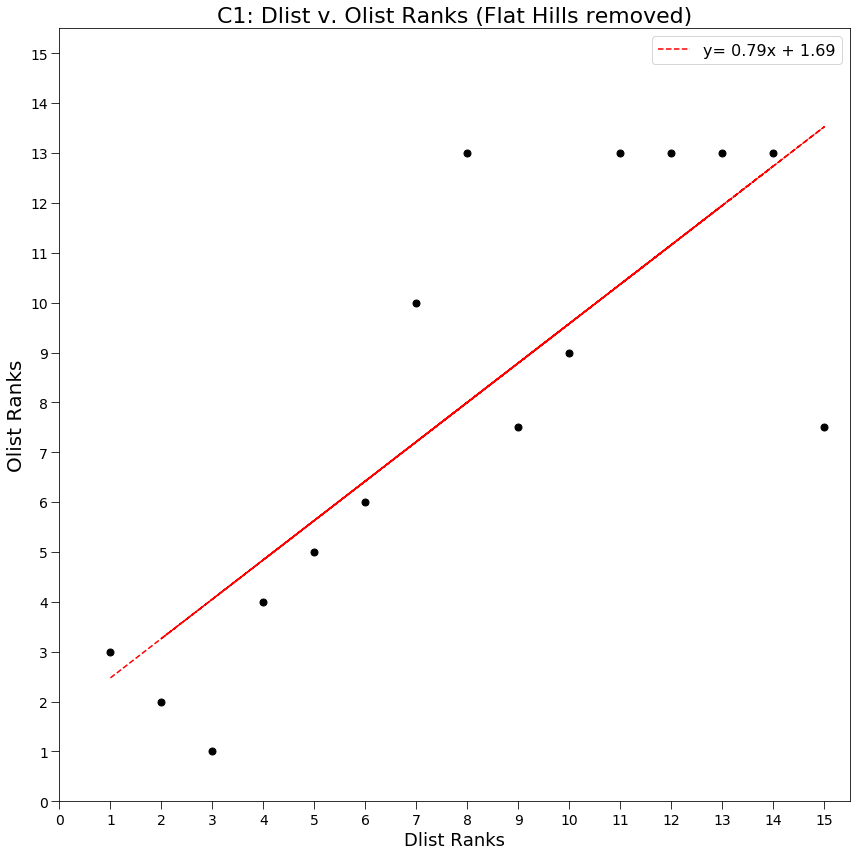

In [61]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df.c1_dlist, df.c1_olist, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, df.c1_dlist, df.c1_olist)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(df.c1_dlist, linear(df.c1_dlist, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,15.5)
ax1.set_ylim(0,15.5)

ax1.set_title("C1: Dlist v. Olist Ranks (Flat Hills removed)", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
    
plt.savefig('C1fh regression chart.png')

In [62]:
#fit multiple linear regression model
c2fh_model = ols('c2_olist ~ c2_dlist', data=df).fit()

#view model summary
print(c2fh_model.summary())

                            OLS Regression Results                            
Dep. Variable:               c2_olist   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4.480
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0542
Time:                        13:20:57   Log-Likelihood:                -40.058
No. Observations:                  15   AIC:                             84.12
Df Residuals:                      13   BIC:                             85.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2000      2.040      2.058      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


slope = 0.47 (+/-) 0.22
y-intercept = 4.20 (+/-) 2.04


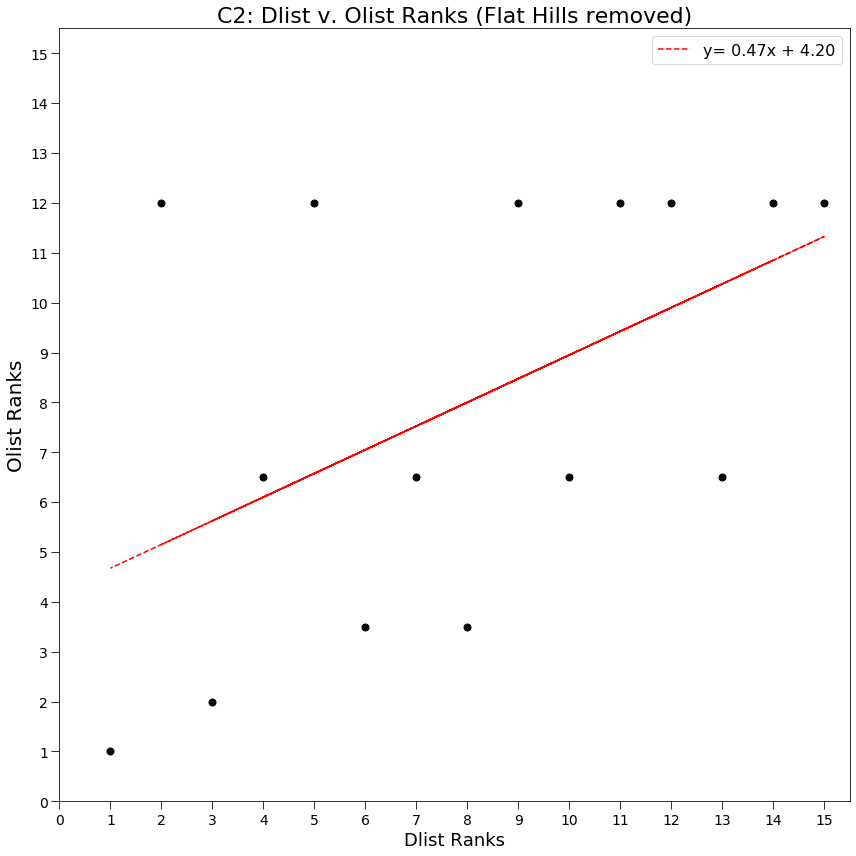

In [63]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df.c2_dlist, df.c2_olist, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, df.c2_dlist, df.c2_olist)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(df.c2_dlist, linear(df.c2_dlist, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,15.5)
ax1.set_ylim(0,15.5)

ax1.set_title("C2: Dlist v. Olist Ranks (Flat Hills removed)", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
    
plt.savefig('C2fh regression chart.png')

In [64]:
#fit multiple linear regression model
c3fh_model = ols('c3_olist ~ c3_dlist', data=df).fit()

#view model summary
print(c3fh_model.summary())

                            OLS Regression Results                            
Dep. Variable:               c3_olist   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     7.578
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0164
Time:                        13:21:47   Log-Likelihood:                -38.460
No. Observations:                  15   AIC:                             80.92
Df Residuals:                      13   BIC:                             82.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5571      1.834      1.939      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


slope = 0.56 (+/-) 0.20
y-intercept = 3.56 (+/-) 1.83


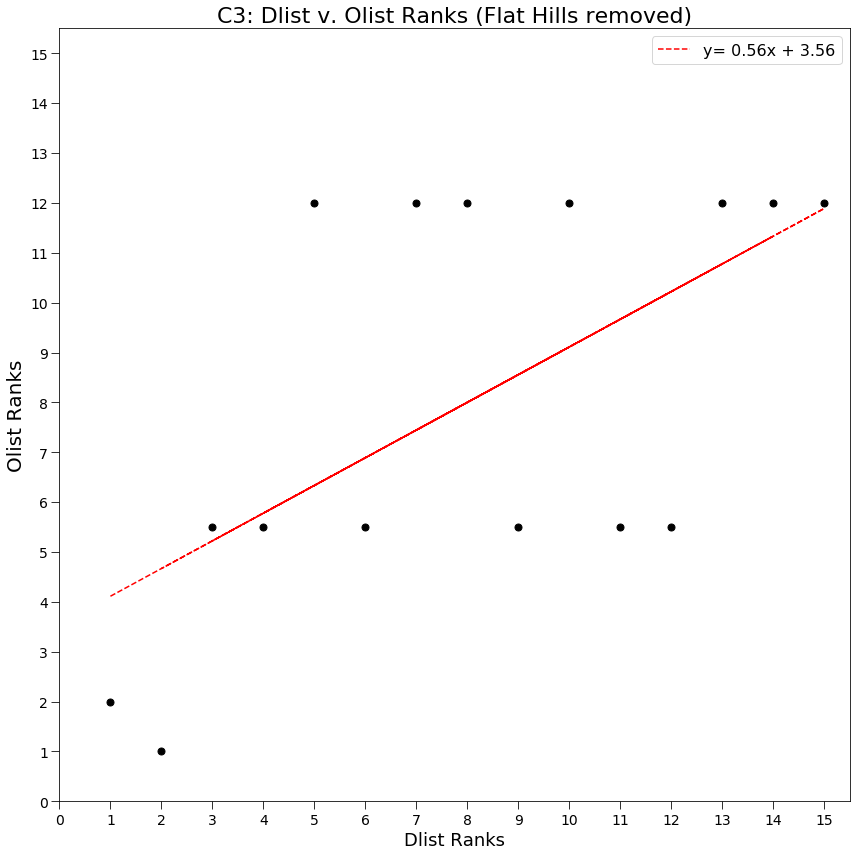

In [65]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df.c3_dlist, df.c3_olist, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, df.c3_dlist, df.c3_olist)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(df.c3_dlist, linear(df.c3_dlist, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,15.5)
ax1.set_ylim(0,15.5)

ax1.set_title("C3: Dlist v. Olist Ranks (Flat Hills removed)", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
    
plt.savefig('C3fh regression chart.png')

In [66]:
#fit multiple linear regression model
c4fh_model = ols('c4_olist ~ c4_dlist', data=df).fit()

#view model summary
print(c4fh_model.summary())

                            OLS Regression Results                            
Dep. Variable:               c4_olist   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     9.759
Date:                Thu, 16 Dec 2021   Prob (F-statistic):            0.00807
Time:                        13:22:21   Log-Likelihood:                -38.421
No. Observations:                  15   AIC:                             80.84
Df Residuals:                      13   BIC:                             82.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9714      1.829      1.624      0.1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


slope = 0.63 (+/-) 0.20
y-intercept = 2.97 (+/-) 1.83


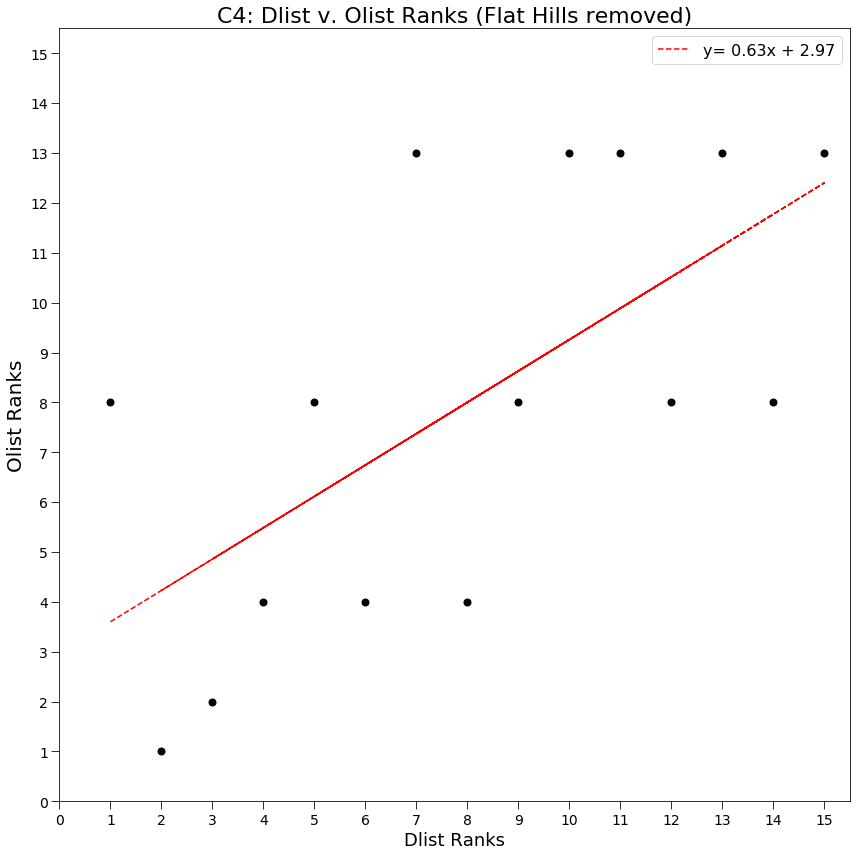

In [67]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df.c4_dlist, df.c4_olist, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, df.c4_dlist, df.c4_olist)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(df.c4_dlist, linear(df.c4_dlist, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,15.5)
ax1.set_ylim(0,15.5)

ax1.set_title("C4: Dlist v. Olist Ranks (Flat Hills removed)", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
    
plt.savefig('C4fh regression chart.png')

In [68]:
#fit multiple linear regression model
c5fh_model = ols('c5_olist ~ c5_dlist', data=df).fit()

#view model summary
print(c5fh_model.summary())

                            OLS Regression Results                            
Dep. Variable:               c5_olist   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     5.174
Date:                Thu, 16 Dec 2021   Prob (F-statistic):             0.0405
Time:                        13:22:56   Log-Likelihood:                -35.361
No. Observations:                  15   AIC:                             74.72
Df Residuals:                      13   BIC:                             76.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0143      1.492      3.361      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


slope = 0.37 (+/-) 0.16
y-intercept = 5.01 (+/-) 1.49


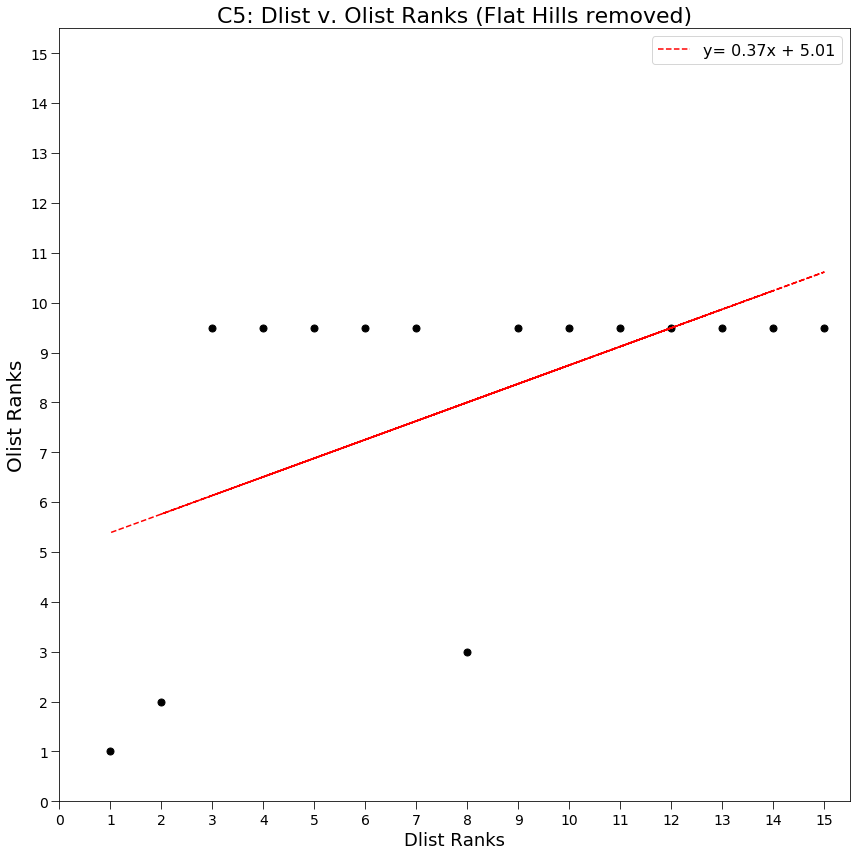

In [69]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(df.c5_dlist, df.c5_olist, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, df.c5_dlist, df.c5_olist)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(df.c5_dlist, linear(df.c5_dlist, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(0,15.5)
ax1.set_ylim(0,15.5)

ax1.set_title("C5: Dlist v. Olist Ranks (Flat Hills removed)", fontsize=22)
ax1.set_xlabel("Dlist Ranks",  fontsize=18)
ax1.set_ylabel("Olist Ranks",  fontsize=20)
ax1.legend(loc='best', fontsize=16)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.tick_params(axis='both',which='major', direction="out", bottom="on", length=8, labelsize=14)
ax1.tick_params(axis='both',which='minor', direction="out", bottom="on", length=5, labelsize=14)

fig.tight_layout()
    
plt.savefig('C5fh regression chart.png')

## Plot the Landscape Learning results

%LL = (1 - r^2)   Calculations and group ages are described in my dissertation, Chapter 5

In [71]:
Cfh_LL = [71.5, 57.1, 63.2, 74.4, 35.3]
Cfh_dates = [9050, 9300, 9750, 10050, 10650]

#create dataset
Cfh_df = pd.DataFrame({'Cfh_LL': Cfh_LL,
                     'Cfh_dates': Cfh_dates})
#view dataset
Cfh_df

,Cfh_LL,Cfh_dates
0,71.5,9050
1,57.1,9300
2,63.2,9750
3,74.4,10050
4,35.3,10650


slope = -0.02 (+/-) 0.01
y-intercept = 211.54 (+/-) 108.25


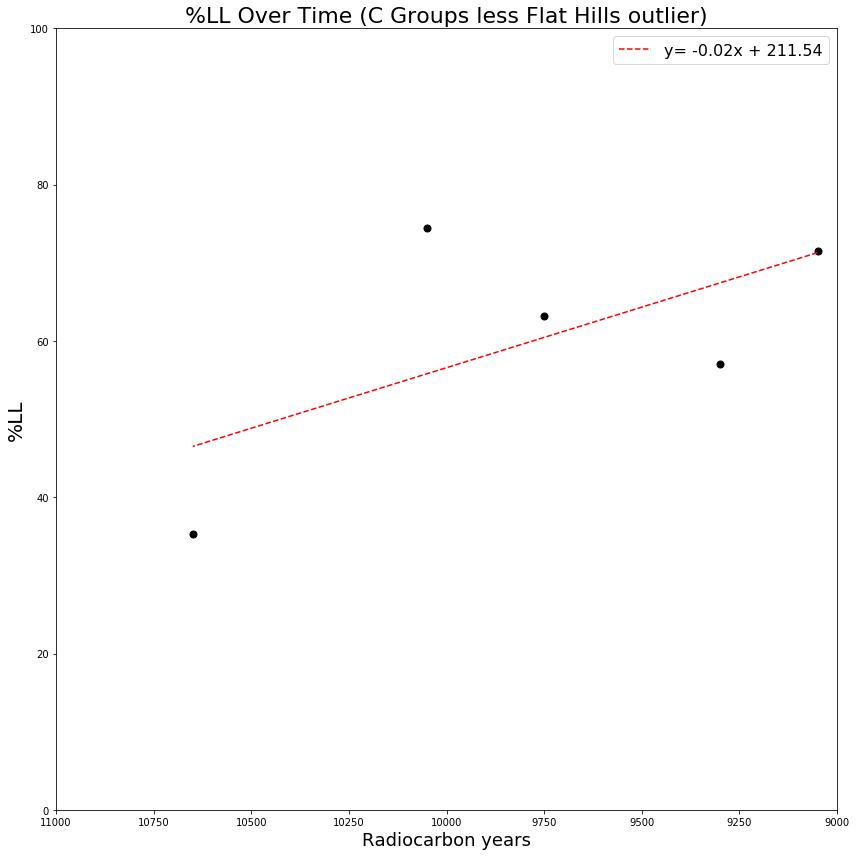

In [72]:
fig = plt.figure(figsize=(12,12))
gs = GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(Cfh_df.Cfh_dates, Cfh_df.Cfh_LL, "ko", markersize=7)    

# popt_linear: this contains the fitting parameters
# pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = scipy.optimize.curve_fit(linear, Cfh_df.Cfh_dates, Cfh_df.Cfh_LL)
perr_linear = np.sqrt(np.diag(pcov_linear))
print ("slope = %0.2f (+/-) %0.2f" % (popt_linear[0], perr_linear[0]))
print( "y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

ax1.plot(Cfh_df.Cfh_dates, linear(Cfh_df.Cfh_dates, *popt_linear), 'r--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlim(11000,9000)
ax1.set_ylim(0,100)

ax1.set_title("%LL Over Time (C Groups less Flat Hills outlier)", fontsize=22)
ax1.set_ylabel("%LL",  fontsize=20)
ax1.set_xlabel("Radiocarbon years",  fontsize=18)
ax1.legend(loc='best', fontsize=16)

fig.tight_layout()
   
plt.savefig('Cfh LL.png')

In [73]:
Cfh_pearson_r, Cfh_pearson_r_pval = stats.pearsonr(Cfh_LL, Cfh_dates)
print("Cfh Pearson's r:          ", str(round(Cfh_pearson_r, 3)))
print("Cfh Pearson's r, p value: ", str(round(Cfh_pearson_r_pval, 4)))
print("--------------------------------")
Cfh_spearman_r, Cfh_spearman_r_pval = stats.spearmanr(Cfh_LL, Cfh_dates)
print("Cfh Spearman's r:          ", str(round(Cfh_spearman_r, 3)))
print("Cfh Spearman's r, p value: ", str(round(Cfh_spearman_r_pval, 4)))

Cfh Pearson's r:           -0.628
Cfh Pearson's r, p value:  0.2562
--------------------------------
Cfh Spearman's r:           -0.3
Cfh Spearman's r, p value:  0.6238


In [74]:
#fit multiple linear regression model
Cfh_model = ols('Cfh_LL ~ Cfh_dates', data=Cfh_df).fit()

#view model summary
print(Cfh_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Cfh_LL   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     1.958
Date:                Thu, 16 Dec 2021   Prob (F-statistic):              0.256
Time:                        13:26:50   Log-Likelihood:                -19.003
No. Observations:                   5   AIC:                             42.01
Df Residuals:                       3   BIC:                             41.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    211.5432    108.254      1.954      0.1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
